In [4]:
import pandas as pd

In [5]:
data=pd.read_csv("Steel_industry_data.csv")

In [6]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
import matplotlib.pyplot as plt

In [8]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# plt.plot(data['date'], data['Usage_kWh'], linewidth=1)

# # Set labels and title
# plt.ylabel('Usage (kWh)')
# plt.xlabel('Date')
# plt.title('Energy Usage Over Time')

# # Add grid lines
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Tight layout
# plt.tight_layout()

# # Show the plot
# plt.show()



In [9]:
# plt.savefig('energy_usage.png', dpi=300)


In [10]:
data["Load_Type"].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

# preporcessing

**set load type**

In [11]:
def setLoadTypes(type):
    if type=="Light_Load":
        return 1
    elif type=="Medium_Load":
        return 2
    else:
        return 3

data["Load_Type_tok"]=data["Load_Type"].apply(setLoadTypes)

In [12]:
data['Load_Type'].value_counts(),data["Load_Type_tok"].value_counts()

(Load_Type
 Light_Load      18072
 Medium_Load      9696
 Maximum_Load     7272
 Name: count, dtype: int64,
 Load_Type_tok
 1    18072
 2     9696
 3     7272
 Name: count, dtype: int64)

In [13]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Load_Type_tok
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1


**set week status**

In [14]:
encoded_data=pd.get_dummies(data, columns=["WeekStatus"])

In [15]:
encoded_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Monday,Light_Load,1,True,False
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Monday,Light_Load,1,True,False
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Monday,Light_Load,1,True,False
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Monday,Light_Load,1,True,False
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Monday,Light_Load,1,True,False


**drop load, week**

In [16]:
After_droped_data=encoded_data.drop(columns=["Day_of_week","Load_Type"])

In [17]:
After_droped_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,True,False
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,True,False
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,True,False
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,True,False
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,True,False


In [18]:
After_droped_data['date'] = pd.to_datetime(After_droped_data['date'], format="%d/%m/%Y %H:%M")
After_droped_data.set_index('date', inplace=True)

In [19]:
After_droped_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
date,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,1,True,False
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,True,False
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,True,False
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,True,False
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,True,False


**data resampled to hour**

In [20]:
data_resampled = After_droped_data.resample('1h').mean().reset_index()

In [21]:
data_resampled.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,2018-01-01 00:00:00,3.4575,3.5375,0.0,0.0,70.1400,100.0,1350.0,1.0,1.0,0.0
1,2018-01-01 01:00:00,3.5025,3.9400,0.0,0.0,66.5475,100.0,4950.0,1.0,1.0,0.0
2,2018-01-01 02:00:00,3.5300,4.1675,0.0,0.0,64.7400,100.0,8550.0,1.0,1.0,0.0
3,2018-01-01 03:00:00,3.4550,4.0500,0.0,0.0,65.0675,100.0,12150.0,1.0,1.0,0.0
4,2018-01-01 04:00:00,3.6175,4.4100,0.0,0.0,63.5175,100.0,15750.0,1.0,1.0,0.0


In [22]:
# plt.figure(figsize=(10,5))
# plt.plot(data_resampled['date'], data_resampled['Usage_kWh'], linewidth=1)

# # Set labels and title
# plt.ylabel('Usage (kWh)')
# plt.xlabel('Date')
# plt.title('Energy Usage Over Time after data resampled')

# # Add grid lines
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Tight layout
# plt.tight_layout()

# # Show the plot
# plt.show()

# get x, y

In [23]:
x=data_resampled.drop(columns=["date","Usage_kWh"])
y=data_resampled["Usage_kWh"]

In [24]:
x.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_tok,WeekStatus_Weekday,WeekStatus_Weekend
0,3.5375,0.0,0.0,70.1400,100.0,1350.0,1.0,1.0,0.0
1,3.9400,0.0,0.0,66.5475,100.0,4950.0,1.0,1.0,0.0
2,4.1675,0.0,0.0,64.7400,100.0,8550.0,1.0,1.0,0.0
3,4.0500,0.0,0.0,65.0675,100.0,12150.0,1.0,1.0,0.0
4,4.4100,0.0,0.0,63.5175,100.0,15750.0,1.0,1.0,0.0


In [25]:
y.describe()

count    8760.000000
mean       27.386892
std        31.352647
min         2.465000
25%         3.247500
50%         4.742500
75%        50.960000
max       138.305000
Name: Usage_kWh, dtype: float64

In [26]:
y[0:5]

0    3.4575
1    3.5025
2    3.5300
3    3.4550
4    3.6175
Name: Usage_kWh, dtype: float64

In [27]:
import numpy as np


In [28]:
def create_sliding_windows(x,y,window_size):
    x_win, y_win=[],[]
    for i in range(len(x)-window_size):
        window=x[i:(i+window_size)]
        usage=y[i+window_size]
        x_win.append(window)
        y_win.append(usage)
    return np.array(x_win), np.array(y_win)

In [29]:
window_sizes=[1,4,8,12,16]

final_data={}

for size in window_sizes:
    x_temp,y_temp= create_sliding_windows(x,y,size)
    final_data[f'win_{size}']=(x_temp, y_temp)


In [30]:
print(final_data["win_4"])

(array([[[ 3.5375,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 3.94  ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 4.1675,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 4.05  ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ]],

       [[ 3.94  ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 4.1675,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 4.05  ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 4.41  ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ]],

       [[ 4.1675,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 4.05  ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 4.41  ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 3.815 ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.    ]],

       ...,

       [[ 0.    , 13.5025,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 0.    , 11.835 ,  0.    , ...,  1.    ,  1.    ,  0.    ],
        [ 0.  

**data spliting**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_test={}

In [33]:
for batch in final_data:
    print(len(final_data[batch][1]),"--",len(final_data[batch][0]))
    x_tr, x_te, y_tr, y_te=train_test_split(final_data[batch][0],final_data[batch][1],train_size=0.82, shuffle=False)
    print("-->", len(x_tr), "  ", len(x_te), "  ", len(y_tr), "  ", len(y_te))
    train_test[batch]={
        "x_train":x_tr,
        "x_test":x_te,
        "y_train":y_tr,
        "y_test":y_te
    }


8759 -- 8759
--> 7182    1577    7182    1577
8756 -- 8756
--> 7179    1577    7179    1577
8752 -- 8752
--> 7176    1576    7176    1576
8748 -- 8748
--> 7173    1575    7173    1575
8744 -- 8744
--> 7170    1574    7170    1574


In [34]:
final_data['win_8'][0].shape, final_data['win_8'][1].shape

((8752, 8, 9), (8752,))

In [35]:
final_data['win_8'][1].reshape(-1,1).shape

(8752, 1)

**normalizing**

> **Creating Models**

In [36]:
train_test['win_1']['x_train']

array([[[3.5375, 0.    , 0.    , ..., 1.    , 1.    , 0.    ]],

       [[3.94  , 0.    , 0.    , ..., 1.    , 1.    , 0.    ]],

       [[4.1675, 0.    , 0.    , ..., 1.    , 1.    , 0.    ]],

       ...,

       [[6.2   , 0.    , 0.    , ..., 1.    , 0.    , 1.    ]],

       [[6.0675, 0.    , 0.    , ..., 1.    , 0.    , 1.    ]],

       [[6.045 , 0.    , 0.    , ..., 1.    , 0.    , 1.    ]]])

In [37]:
train_test['win_1']['y_train']

array([3.5025, 3.53  , 3.455 , ..., 3.1425, 3.315 , 3.33  ])

In [38]:
train_test['win_1']['x_train'].shape,train_test['win_1']['y_train'].shape

((7182, 1, 9), (7182,))

In [39]:
import tensorflow as tf

In [40]:
import tensorflow as tf

single_LSTM = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='tanh', return_sequences=False,
                         input_shape=(train_test['win_1']['x_train'].shape[1], 
                                      train_test['win_1']['x_train'].shape[2])),
    tf.keras.layers.Dense(1)  
])

single_LSTM.compile(optimizer='adam', loss='mse', metrics=['mse'])  # MSE loss, MAE metric

c:\Users\dinit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
single_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
import tensorflow as tf
import tensorflow.keras.backend as K 

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

single_LSTM.compile(optimizer='adam', loss=rmse)


In [43]:
y_t=train_test['win_1']['y_train'].reshape(-1,1)

In [44]:
y_t.shape

(7182, 1)

In [45]:
y_t

array([[3.5025],
       [3.53  ],
       [3.455 ],
       ...,
       [3.1425],
       [3.315 ],
       [3.33  ]])

In [46]:
single_LSTM.fit(train_test['win_1']['x_train'], y_t, epochs=50)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 41.2987 - mse: 1746.7192
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38.8317 - mse: 1539.5588
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37.0351 - mse: 1406.8850
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 35.9887 - mse: 1328.4656
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35.3760 - mse: 1278.2234
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.6258 - mse: 1224.4340
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33.6134 - mse: 1155.2908
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32.6376 - mse: 1091.4023
Epoch 9/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32.4602 - mse: 1079.0143
Epoch 10/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31.9587 - mse: 1040.8728
Epoch 11/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31.3633 - mse: 1002.0646
Epoch 12/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31

In [47]:
loss = single_LSTM.evaluate(train_test['win_1']['x_test'], train_test['win_1']['y_test'])
print(f"Test Loss: {loss}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29.9563 - mse: 948.5333
Test Loss: [28.92138671875, 885.0181274414062]


In [48]:
train_test['win_1']['x_test']

array([[[6.60750e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.00000e+00]],

       [[6.24750e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.00000e+00]],

       [[2.93025e+01, 0.00000e+00, 1.25000e-02, ..., 1.00000e+00,
         0.00000e+00, 1.00000e+00]],

       ...,

       [[0.00000e+00, 1.67325e+01, 0.00000e+00, ..., 1.00000e+00,
         1.00000e+00, 0.00000e+00]],

       [[0.00000e+00, 1.33675e+01, 0.00000e+00, ..., 1.00000e+00,
         1.00000e+00, 0.00000e+00]],

       [[3.08750e+00, 3.32250e+00, 0.00000e+00, ..., 1.00000e+00,
         1.00000e+00, 0.00000e+00]]])

In [49]:
pre=single_LSTM.predict(train_test['win_1']['x_train'])

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [50]:
pre

array([[27.356745],
       [27.356745],
       [27.356745],
       ...,
       [27.356745],
       [27.356745],
       [27.356745]], dtype=float32)

In [51]:
train_test['win_1']['y_test']

array([ 3.1675, 31.9225, 45.4575, ...,  3.4375,  3.5375,  3.7875])

In [52]:
i=range(0,len(train_test['win_1']['y_test']))

In [53]:
len(pre)

7182

ValueError: x and y must have same first dimension, but have shapes (1577,) and (7182, 1)

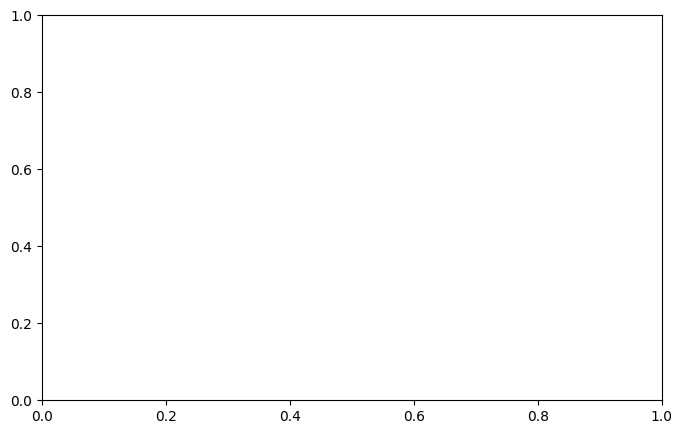

In [54]:
# Create plot
plt.figure(figsize=(8, 5))
plt.plot(i, pre, color='b')
plt.plot(i, train_test['win_1']['y_train'], color='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Sine Wave Plot')
plt.legend()
plt.grid(True)

# Show plot
plt.show()